## INFO7390 Summer'23

### HeartFailurePrediction&Analytics - TeamDataDriven

In [1]:
## Uncomment and install if not installed on system
#!pip install mlxtend

# After installing please restart the kernal

### Import Libraries

In [2]:

### Importing the required packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# ---------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# ---------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

# ---------------------------------------------------------
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

# ---------------------------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

### EDA

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process that involves investigating and understanding the characteristics, patterns, and relationships within a dataset. Its primary goal is to gain insights, discover patterns, and identify potential anomalies or trends in the data before applying more advanced analysis techniques

In [3]:
# Reading the dataset
df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
# Checking the shape
df.shape

(918, 12)

In [5]:
# Generates a summary of numeric columns
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

Heart Disease Counts:
1    508
0    410
Name: HeartDisease, dtype: int64


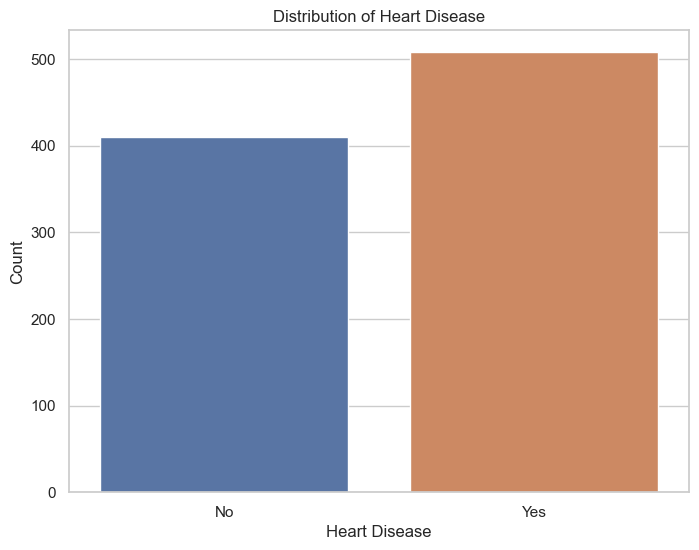

In [6]:
# Count the occurrences of each value in the 'HeartDisease' column
heart_disease_counts = df['HeartDisease'].value_counts()

# Print the count of each value in 'HeartDisease' column
print("Heart Disease Counts:")
print(heart_disease_counts)

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x="HeartDisease", data=df)

plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])  # Assuming '0' means No and '1' means Yes
plt.show()

As we can see from the above visual Maximum people suffer from heart disease

In [7]:
#### Checking the Categorical and Numerical Features in our dataset
# Identify categorical features in the DataFrame
categorical_features_mask = df.dtypes == object
final_categorical_features = df.columns[categorical_features_mask].tolist()

# List of numeric features
final_numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Print the final lists of categorical and numeric features
print("Final Categorical Features:")

print(final_categorical_features)
print("\nFinal Numeric Features:")
print(final_numeric_features)


Final Categorical Features:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Final Numeric Features:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


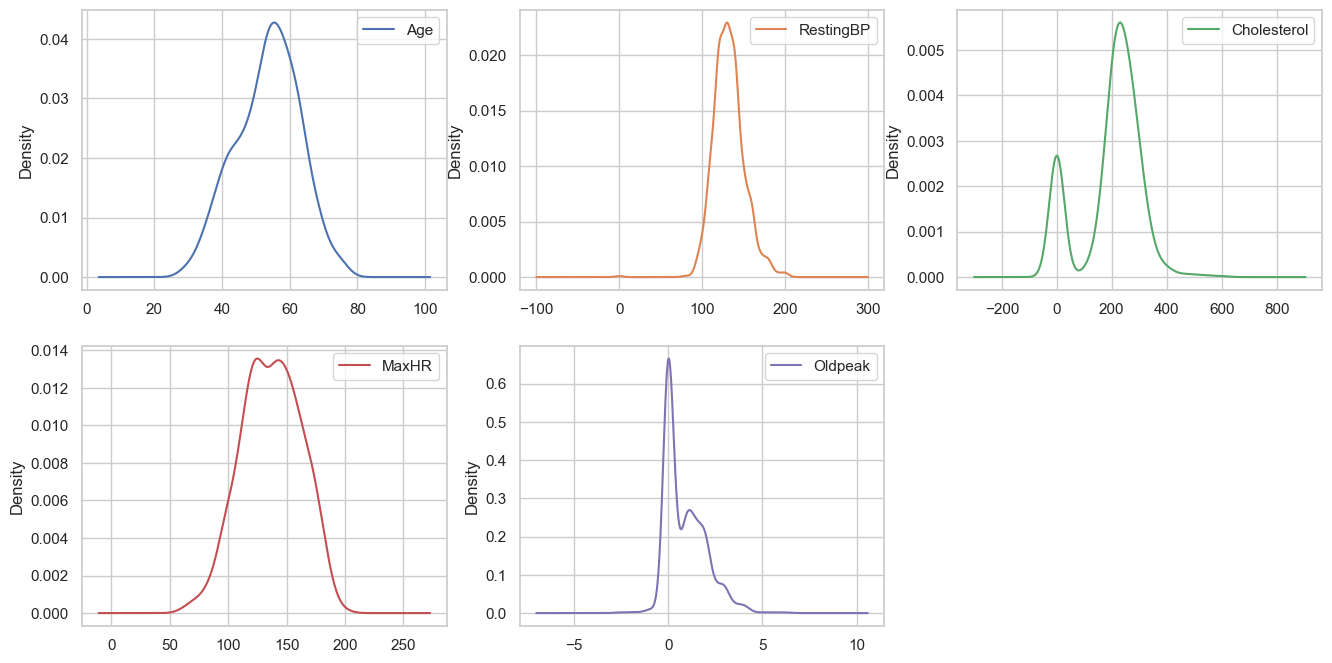

In [8]:
# Create a density plot for each numeric feature
df[final_numeric_features].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

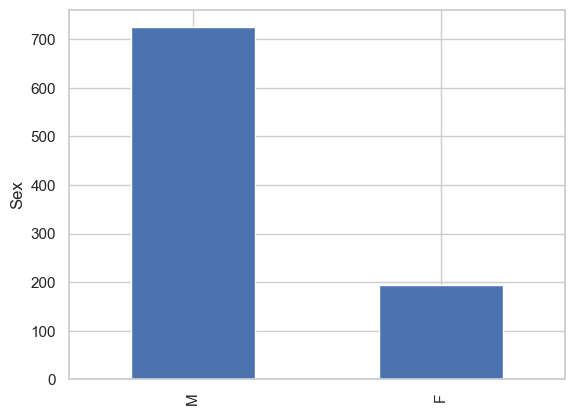

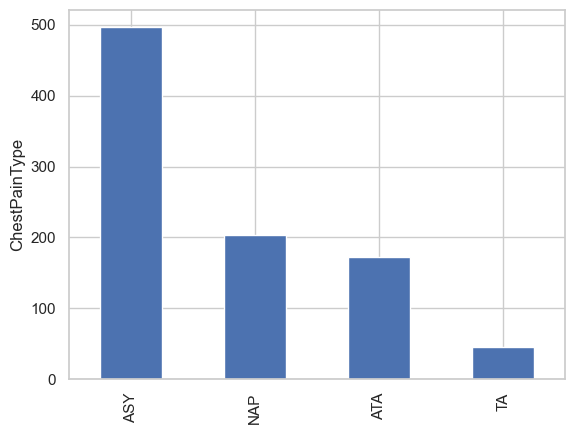

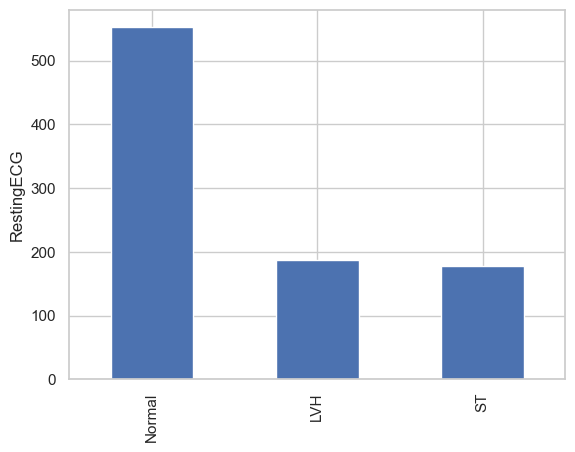

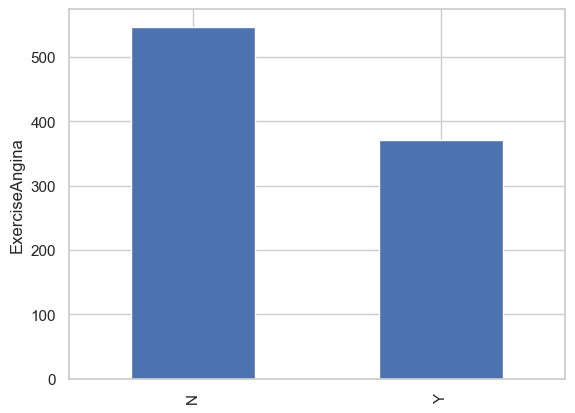

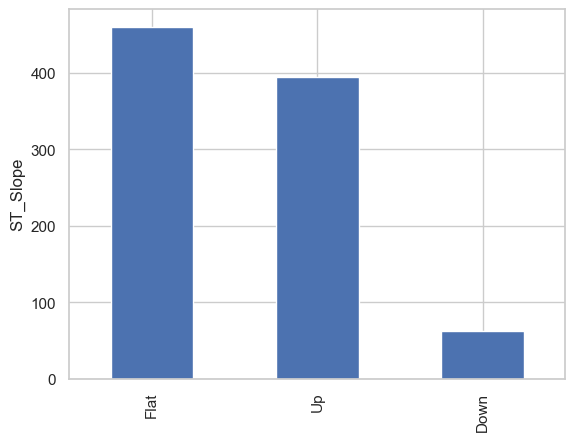

In [9]:
# Iterate through each categorical feature
for i in range(len(final_categorical_features)):
    # Create a bar plot for the current categorical feature
    df[final_categorical_features[i]].value_counts().plot(kind='bar')
    
    # Rotate x-axis labels vertically for readability
    plt.xticks(rotation='vertical')
    
    # Set the y-axis label to the current categorical feature
    plt.ylabel(final_categorical_features[i])
    
    # Display the plot
    plt.show()


In [10]:

## Heatmap of correlation matrix
correlation_matrix = df.corr()

# Convert correlation matrix values to text annotations
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(text=f'{value:.2f}', x=j, y=i, font=dict(color='black')))

# Create the correlation plot with annotations
fig = px.imshow(
    correlation_matrix,
    title="Correlation Plot of the Heat Failure Prediction",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
    labels=dict(color="Correlation"),
)

# Add the annotations to the heatmap
fig.update_layout(annotations=annotations)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_showticklabels=True,
    yaxis_showticklabels=True
)

# Show the plot
fig.show()

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

[]

<Figure size 1500x1000 with 0 Axes>

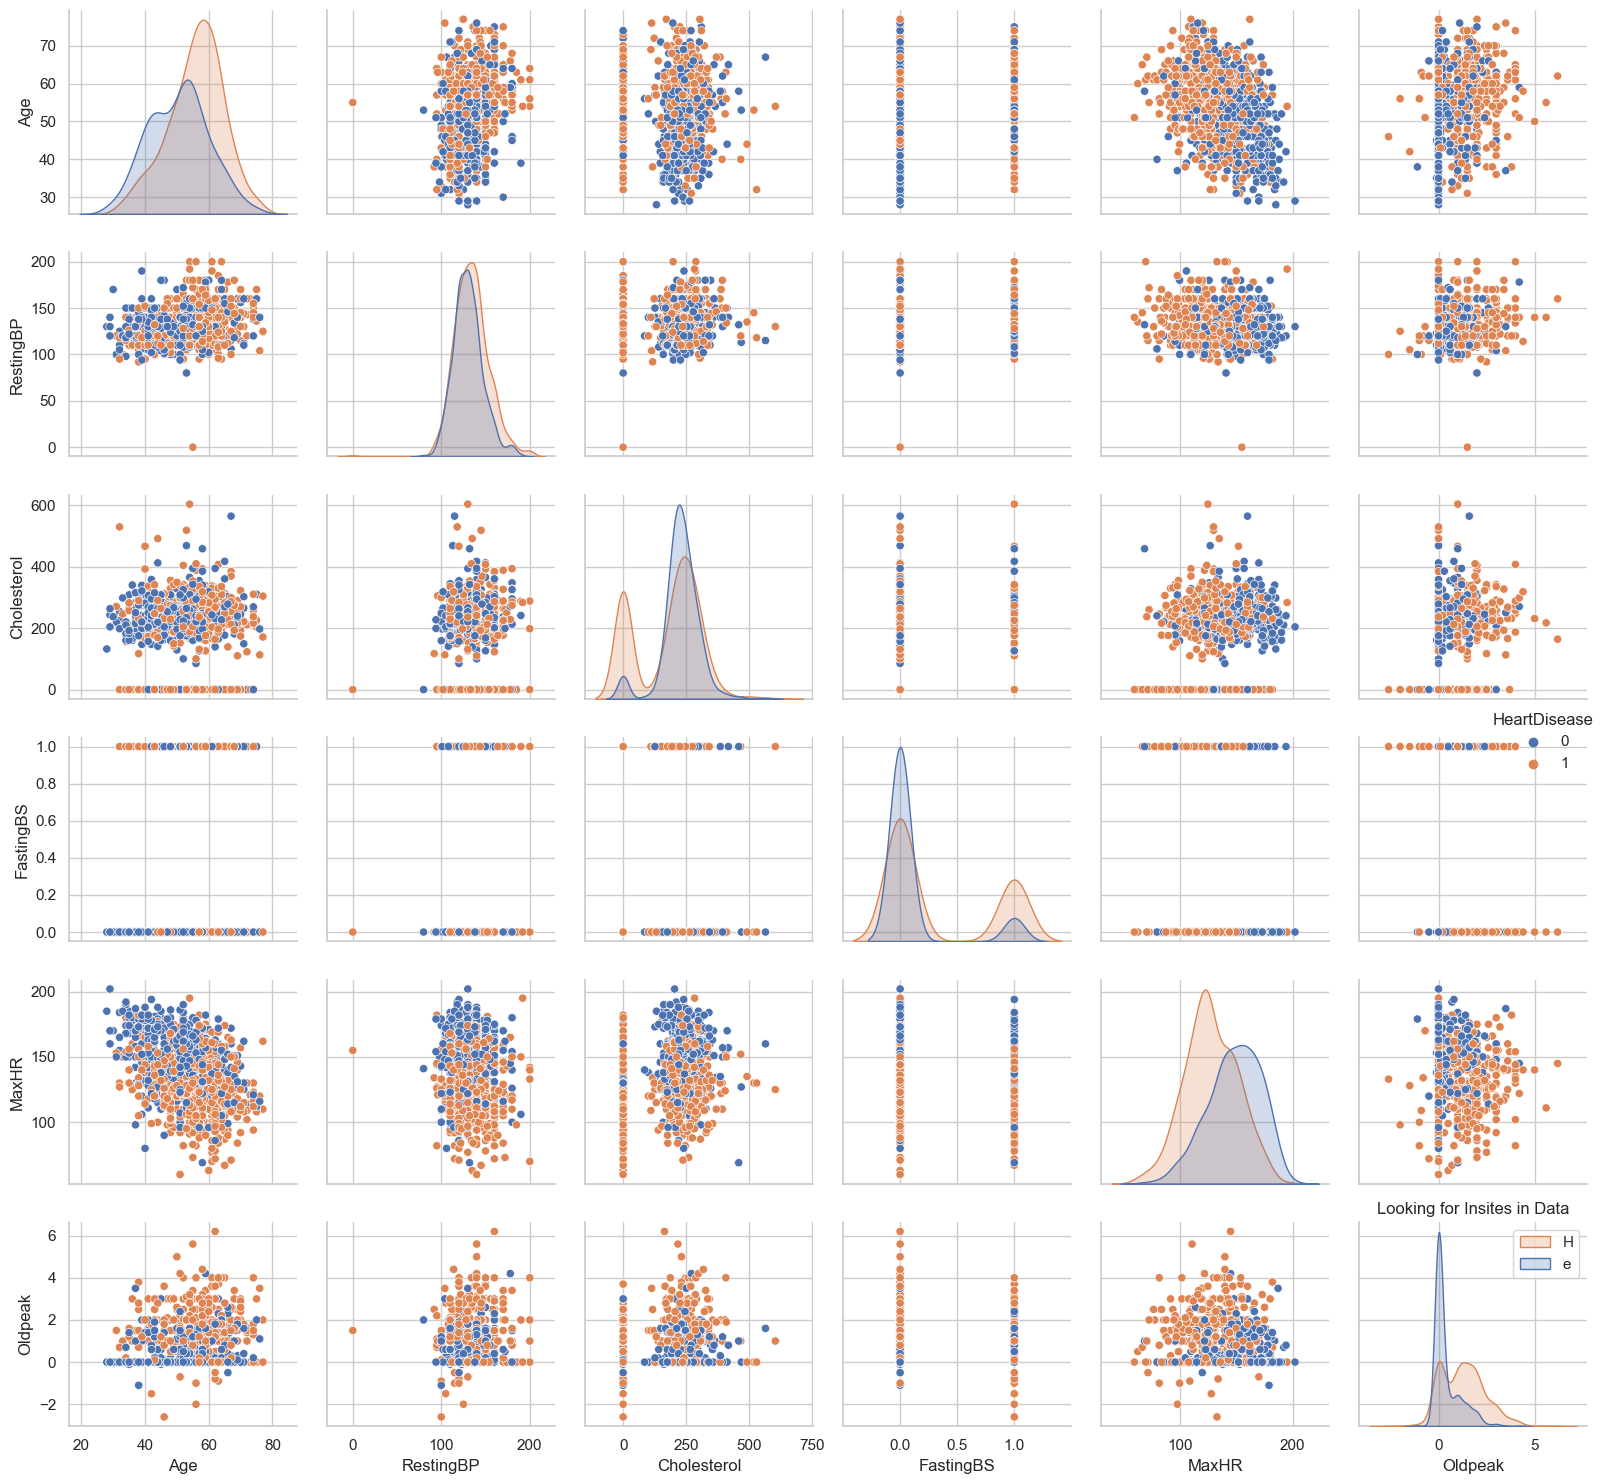

In [11]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Data Pre-processing

In real world dataset we find nulls and we have to handle those nulls to further apply on our model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
# Checking null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

As we can see in our dataset there is no null values

#### Defining Functions

In [14]:
### Here we have multiple functions to calculate the outliers and to tune the model using grid search and random search


def detect_outliers_custom(df, column):
    # Calculate quartiles and IQR for the specified column
    first_quartile = df[column].quantile(0.25)
    iqr = df[column].quantile(0.75) - first_quartile
    third_quartile = df[column].quantile(0.75)
    
    # Detect outliers using custom IQR-based method
    return df[((df[column] < (first_quartile - 1.5 * iqr)) | (df[column] > (third_quartile + 1.5 * iqr)))]

# ---------------------------------------------------------
def detect_outliers_normal(df, column):
    # Calculate mean and standard deviation for the specified column
    mean_value = df[column].mean()
    std_dev = df[column].std()
    
    # Detect outliers using standard deviation method
    return df[((df[column] - mean_value) / std_dev).abs() > 3]

# ---------------------------------------------------------
def lower_outliers(df, column):
    # Calculate quartiles and IQR for the specified column
    first_quartile = df[column].quantile(0.25)
    iqr = df[column].quantile(0.75) - first_quartile
    third_quartile = df[column].quantile(0.75)
    
    # Detect lower outliers
    lower_bound = df[(df[column] < (first_quartile - 1.5 * iqr))]
    return lower_bound

# ---------------------------------------------------------
def upper_outliers(df, column):
    # Calculate quartiles and IQR for the specified column
    first_quartile = df[column].quantile(0.25)
    iqr = df[column].quantile(0.75) - first_quartile
    third_quartile = df[column].quantile(0.75)
    
    # Detect upper outliers
    upper_bound = df[(df[column] > (third_quartile + 1.5 * iqr))]
    return upper_bound

# ---------------------------------------------------------
def replace_with_upper_bound(df, column):
    # Calculate quartiles and IQR for the specified column
    first_quartile = df[column].quantile(0.25)
    iqr = df[column].quantile(0.75) - first_quartile
    third_quartile = df[column].quantile(0.75)
    
    # Replace outliers with upper bound
    tmp_value = 9999999
    upper_bound = third_quartile + 1.5 * iqr
    df[column] = df[column].where(lambda x: (x < upper_bound), tmp_value)
    df[column] = df[column].replace(tmp_value, upper_bound)
    print('Outliers replaced with upper bound - {}'.format(column)) 
    
# ---------------------------------------------------------
def replace_with_lower_bound(df, column):
    # Calculate quartiles and IQR for the specified column
    first_quartile = df[column].quantile(0.25)
    iqr = df[column].quantile(0.75) - first_quartile
    third_quartile = df[column].quantile(0.75)
    
    # Replace outliers with lower bound
    tmp_value = 1111111
    lower_bound = first_quartile - 1.5 * iqr
    df[column] = df[column].where(lambda x: (x > lower_bound), tmp_value)
    df[column] = df[column].replace(tmp_value, lower_bound)
    print('Outliers replaced with lower bound - {}'.format(column)) 

# ---------------------------------------------------------
def preprocess_data(df, column):
    # Display outlier counts and visualizations
    print("*********************** {} ***********************\n".format(column))
    lower_outliers_count = lower_outliers(df, column).shape[0]
    upper_outliers_count = upper_outliers(df, column).shape[0]
    print("Lower outliers: {} ****** Upper outliers: {}\n".format(lower_outliers_count, upper_outliers_count))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[column].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[column].plot(kind='density', subplots=True, sharex=False)
    plt.show()

# # ---------------------------------------------------------
# def tune_model_random_search(classifier, data, X, y, parameters):
#     # Perform randomized search for hyperparameter tuning
#     clf = RandomizedSearchCV(classifier, parameters, scoring='accuracy', cv=5, n_jobs=-1)
#     clf.fit(X, y)
    
#     print("Best score: ", clf.best_score_)
#     print("Best estimator: ", clf.best_estimator_)
#     print("Best parameters: ", clf.best_params_)
    
#     return clf.best_score_

# # ---------------------------------------------------------
# def tune_model_grid_search(classifier, data, X, y, parameters):
#     # Perform grid search for hyperparameter tuning
#     clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, n_jobs=-1)
#     clf.fit(X, y)
    
#     print("Best score: ", clf.best_score_)
#     print("Best estimator: ", clf.best_estimator_)
#     print("Best parameters: ", clf.best_params_)
    
#     return clf.best_score_


#### Manage Outlier

In a real world dataset we can find outliers which can cause problems in our model training. So to avoid that we will remove those outliers

In [15]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each column
first_quartile = df.quantile(0.25)
third_quartile = df.quantile(0.75)
iqr = third_quartile - first_quartile

In [16]:
# Iterate through each numeric feature
for i in range(len(final_numeric_features)):
    # Calculate the number of outliers using custom IQR-based method
    custom_outliers_count = detect_outliers_custom(df, final_numeric_features[i]).shape[0]
    # Calculate the number of outliers using z-score method
    zscore_outliers_count = detect_outliers_normal(df, final_numeric_features[i]).shape[0]
    # Print the outlier counts for the current numeric feature
    print("Outliers using IQR - {}: {}".format(final_numeric_features[i], custom_outliers_count))
    print("Outliers using Z-Score - {}: {}".format(final_numeric_features[i], zscore_outliers_count))
    print("********************************")

Outliers using IQR - Age: 0
Outliers using Z-Score - Age: 0
********************************
Outliers using IQR - RestingBP: 28
Outliers using Z-Score - RestingBP: 8
********************************
Outliers using IQR - Cholesterol: 183
Outliers using Z-Score - Cholesterol: 3
********************************
Outliers using IQR - MaxHR: 2
Outliers using Z-Score - MaxHR: 1
********************************
Outliers using IQR - Oldpeak: 16
Outliers using Z-Score - Oldpeak: 7
********************************


Here we are going to plot Boxplot and Density plot which will tell us the outliers

*********************** Age ***********************

Lower outliers: 0 ****** Upper outliers: 0



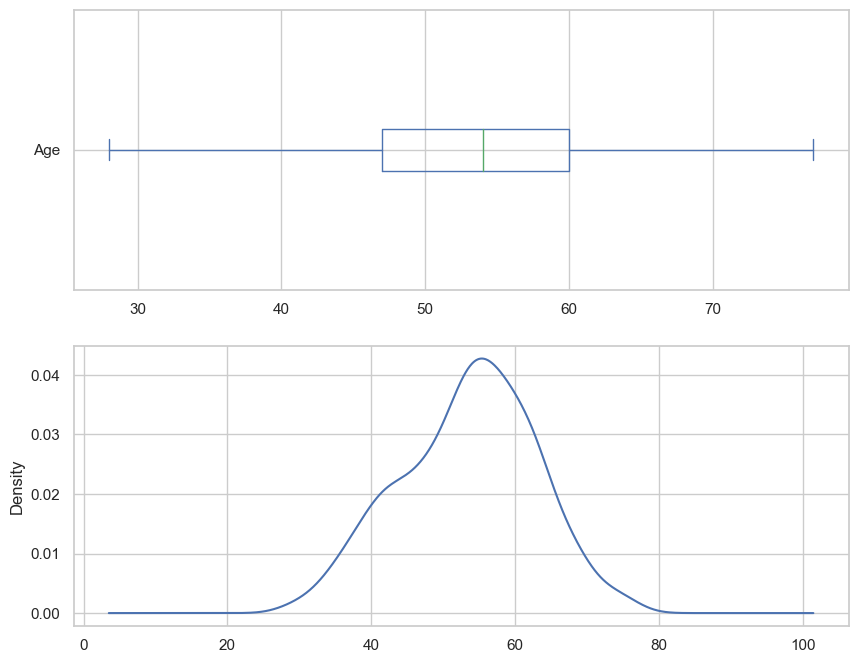

*********************** RestingBP ***********************

Lower outliers: 2 ****** Upper outliers: 26



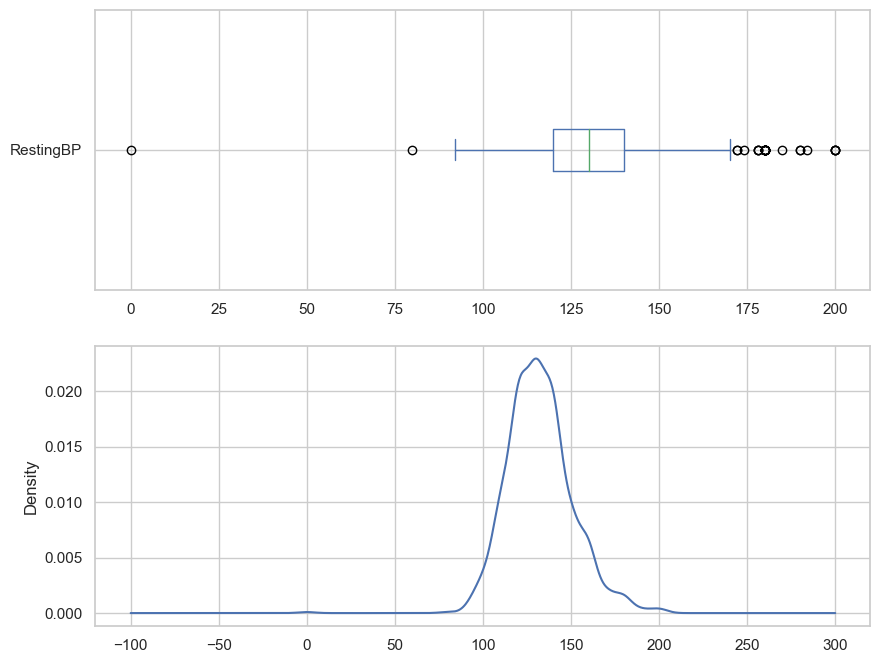

*********************** Cholesterol ***********************

Lower outliers: 172 ****** Upper outliers: 11



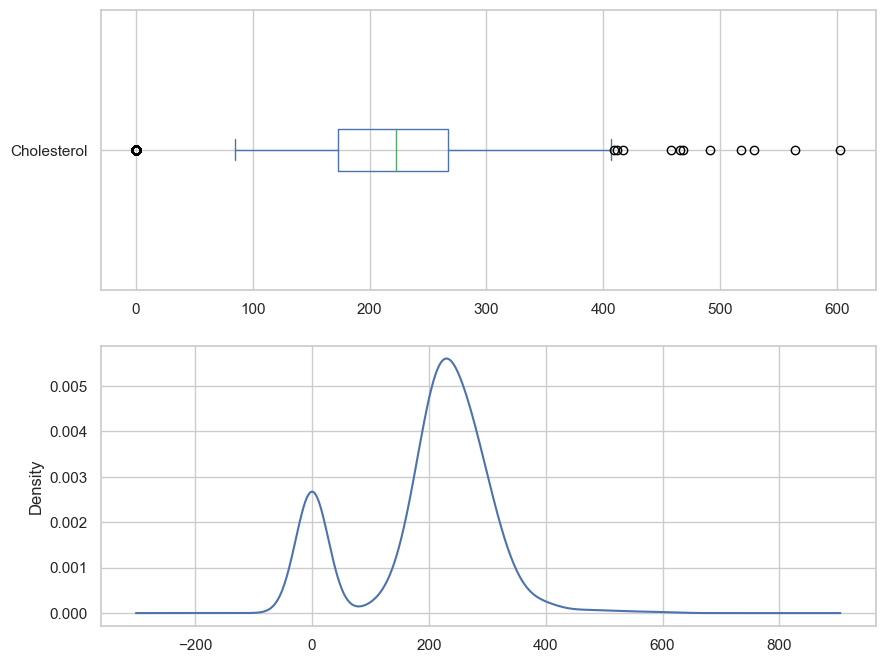

*********************** MaxHR ***********************

Lower outliers: 2 ****** Upper outliers: 0



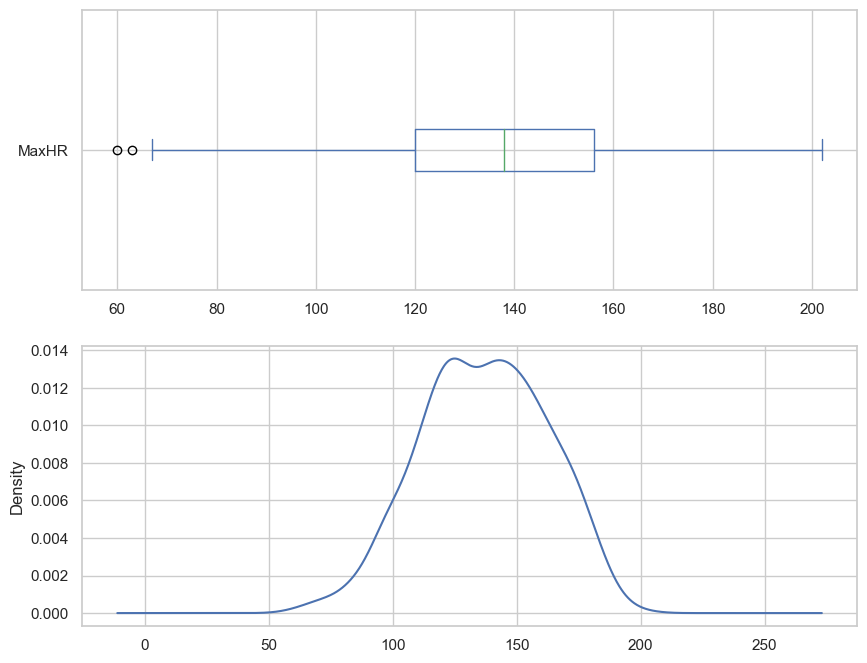

*********************** Oldpeak ***********************

Lower outliers: 1 ****** Upper outliers: 15



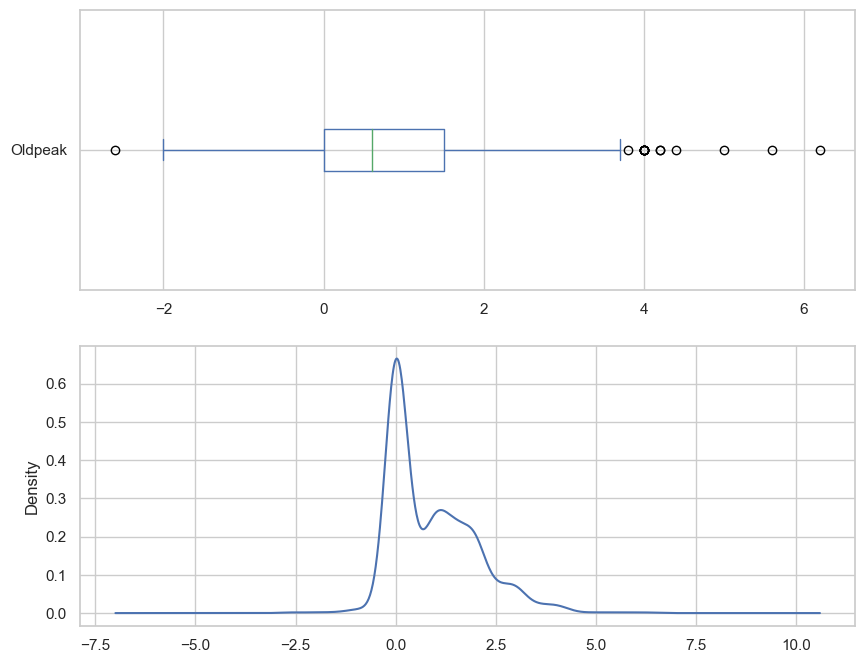

In [17]:
# Iterate through each numeric feature
for i in range(len(final_numeric_features)):
    # Preprocess and visualize the current numeric feature
    preprocess_data(df, final_numeric_features[i])

In [18]:
# Initialize an empty list to store numeric features with outliers
outlier_features = []

# Iterate through each numeric feature
for i in range(len(final_numeric_features)):
    # Check if the current numeric feature has outliers using the custom IQR-based method
    if detect_outliers_custom(df, final_numeric_features[i]).shape[0] != 0:
        # If outliers are detected, add the feature to the list
        outlier_features.append(final_numeric_features[i])

# Print the list of numeric features with outliers
print("Numeric features with outliers:", outlier_features)

Numeric features with outliers: ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [19]:
# Iterate through each feature with outliers
for i in range(len(outlier_features)):
    # Replace upper outliers for the current feature
    replace_with_upper_bound(df, outlier_features[i])

print("\n********************************\n")

# Iterate through each feature with outliers
for i in range(len(outlier_features)):
    # Replace lower outliers for the current feature
    replace_with_lower_bound(df, outlier_features[i])


Outliers replaced with upper bound - RestingBP
Outliers replaced with upper bound - Cholesterol
Outliers replaced with upper bound - MaxHR
Outliers replaced with upper bound - Oldpeak

********************************

Outliers replaced with lower bound - RestingBP
Outliers replaced with lower bound - Cholesterol
Outliers replaced with lower bound - MaxHR
Outliers replaced with lower bound - Oldpeak


In [20]:
# Iterate through each numeric feature
for i in range(len(final_numeric_features)):
    # Calculate the number of outliers using custom IQR-based method
    custom_outliers_count = detect_outliers_custom(df, final_numeric_features[i]).shape[0]
    # Calculate the number of outliers using z-score method
    zscore_outliers_count = detect_outliers_normal(df, final_numeric_features[i]).shape[0]
    
    # Print the outlier counts for the current numeric feature
    print("Outliers using IQR - {}: {}".format(final_numeric_features[i], custom_outliers_count))
    print("Outliers using Z-Score - {}: {}".format(final_numeric_features[i], zscore_outliers_count))
    print("********************************")

Outliers using IQR - Age: 0
Outliers using Z-Score - Age: 0
********************************
Outliers using IQR - RestingBP: 0
Outliers using Z-Score - RestingBP: 0
********************************
Outliers using IQR - Cholesterol: 0
Outliers using Z-Score - Cholesterol: 0
********************************
Outliers using IQR - MaxHR: 0
Outliers using Z-Score - MaxHR: 0
********************************
Outliers using IQR - Oldpeak: 0
Outliers using Z-Score - Oldpeak: 1
********************************


#### Label Encoding

In this dataset we can find some categorical dataset, so we need to convert those to numerical data. For that process we will be using Label Encoding. Label Encoding is a method which assigns a numerical value to its corresponding categorical feature. For eg- in Sex feature - Male will be toggled to 1 and Female will be Toggled to 0.

In [21]:
# Apply label encoding to each categorical feature in the DataFrame
label_encoder = LabelEncoder()
df[final_categorical_features] = df[final_categorical_features].apply(lambda col: label_encoder.fit_transform(col))
df.head(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          0           1   
1   49    0              2        160        180.0          0           1   
2   37    1              1        130        283.0          0           2   
3   48    0              0        138        214.0          0           1   
4   54    1              2        150        195.0          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

#### Check for Duplicate Data

Like Null values we also need to check the duplicates in our dataset. 

In [22]:
df.loc[df.duplicated()].shape

(0, 12)

As we can see we don't have any duplicates in our dataset

### Train Test Split & Normalization

In [23]:
# Separate the features (x) and the target variable (y)
x = df.drop("HeartDisease", axis = 1)
y = df['HeartDisease']

In [24]:
# Split the data into training and testing sets using train_test_split
# Here we are splitting the data set to 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.3)
print(y_train.value_counts())

1    355
0    287
Name: HeartDisease, dtype: int64


### Feature Scaling

MinMaxScaler is a data preprocessing technique used in machine learning and data analysis to scale numerical features to a specific range. It transforms the data in such a way that it falls within a defined range, usually between 0 and 1.

In [25]:
# Initialize the MinMaxScaler
scale = MinMaxScaler()
# List of columns to be scaled
col = ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']
# Scale columns into training set
x_train[col] = scale.fit_transform(x_train[col])
# Scale columns into test set
x_test[col] = scale.transform(x_test[col])

### Feature Selection

Here we will be using Sequential Feature Selector, which uses the best combination of features that maximizes the model's performance while minimizing overfitting and reducing computational complexity.

In [26]:
# Initialize the Sequential Feature Selector (SFS) with a GradientBoostingClassifier estimator
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.3s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.4s finished

[2023-08-15 00:12:06] Features: 1/7 -- score: 0.8130628881987577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished

[2023-08-15 00:12:10] Features: 2/7 -- score: 0.8364615683229814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.4s finished

[2023-08-15 00:12:11] Features: 3/7 -- score: 0.8457880434782609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   

In [27]:
print("Best features: ",sfs.k_feature_names_)
print("Best score: ",sfs.k_score_)

Best features:  ('Sex', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')
Best score:  0.8738451086956522


In [28]:
x_train_new = x_train[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]
x_test_new = x_test[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]

## Modeling with Hyper-Parameter Tuning

We are going to use Hyper-Parameter Tuning in which it is a process of finding the best hyper-parameter. The main advantage of Hyper-Parameter Tuning is that it avoids over-fitting

### Decision Tree Classifier

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the dataset into subsets based on feature values, aiming to maximize information gain or minimize impurity at each split. Each leaf node represents a class label or a predicted value, and the path from the root to a leaf describes the decision-making process based on features. Decision trees are intuitive, interpretable, and can handle both categorical and numerical data, but they are prone to overfitting and may not capture complex relationships in the data.

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Train set Accuracy (Best Model):  0.897196261682243
Test set Accuracy (Best Model):  0.8115942028985508
Precision Score (Best Model):  0.8389261744966443
Recall Score (Best Model):  0.8169934640522876
F1-Score (Best Model):  0.8278145695364238
ROC AUC (Best Model):  0.868377703384877

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.84      0.82      0.83       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276




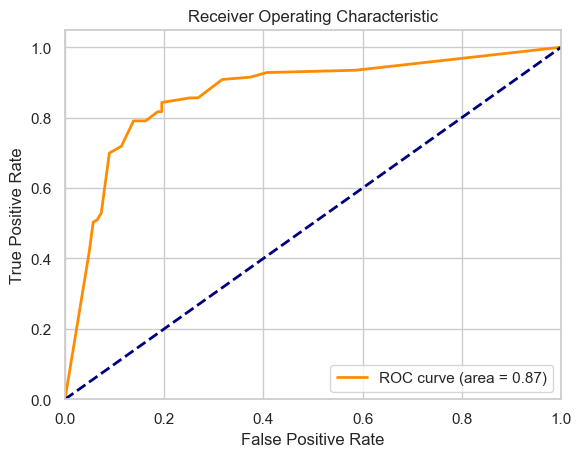

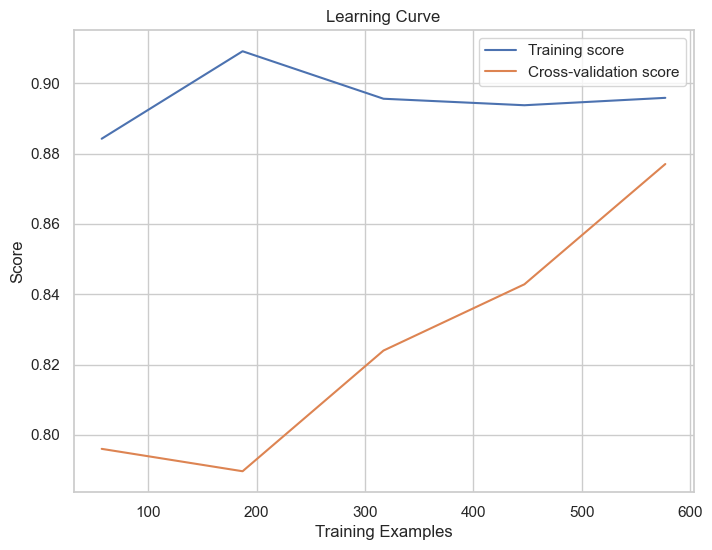

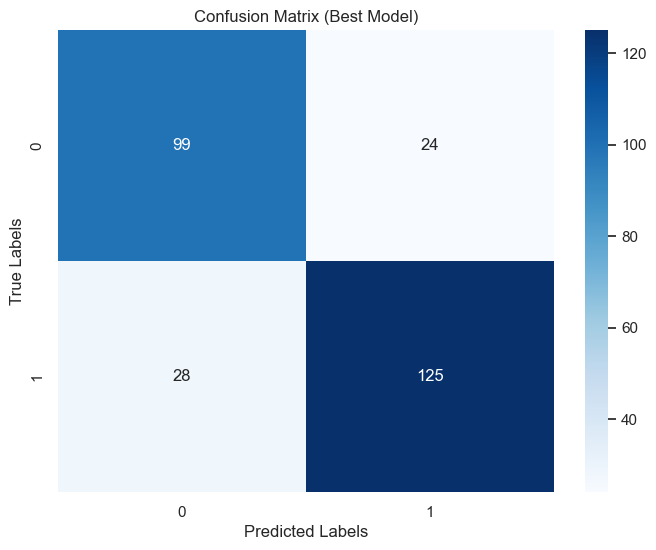

In [29]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(DT, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Decision Tree Classifier with best hyperparameters
best_DT = DecisionTreeClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_DT.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_DT = best_DT.predict(x_test_new)
y_train_pred_DT = best_DT.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_DT)
print("Test set Accuracy (Best Model): ", test_acc_DT)

# Calculate precision, recall, and F1-score for the best model
precision_score_DT = precision_score(y_test, y_test_pred_DT)
recall_score_DT = recall_score(y_test, y_test_pred_DT)
f1_score_DT = f1_score(y_test, y_test_pred_DT)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_DT)
print("Recall Score (Best Model): ", recall_score_DT)
print("F1-Score (Best Model): ", f1_score_DT)

# Compute ROC curve and ROC area for the best model
y_score_DT = best_DT.predict_proba(x_test_new)[:, 1]
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_score_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_DT)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_DT))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_DT, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_DT = confusion_matrix(y_test, y_test_pred_DT)
sns.heatmap(conf_DT, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest Classifier

Random Forest is an ensemble learning algorithm in machine learning. It builds multiple decision trees during training and combines their predictions to improve accuracy and mitigate overfitting. Each tree is trained on a random subset of the data and features, reducing bias and variance. Random Forest is effective for classification and regression tasks and is robust against noisy data and outliers.

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train set Accuracy (Best Model):  0.9252336448598131
Test set Accuracy (Best Model):  0.8514492753623188
Precision Score (Best Model):  0.8636363636363636
Recall Score (Best Model):  0.869281045751634
F1-Score (Best Model):  0.8664495114006514
ROC AUC (Best Model):  0.9106222434773367

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       123
           1       0.86      0.87      0.87       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276




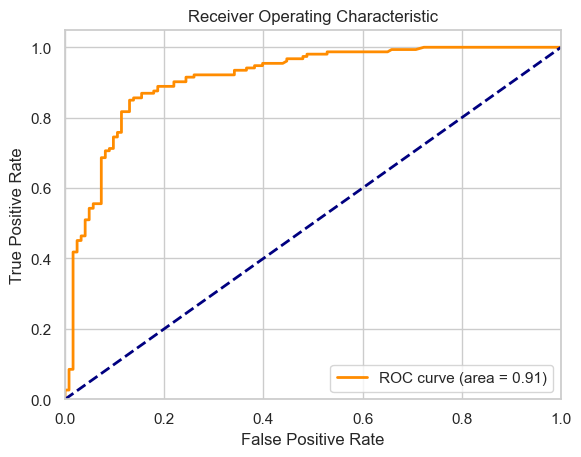

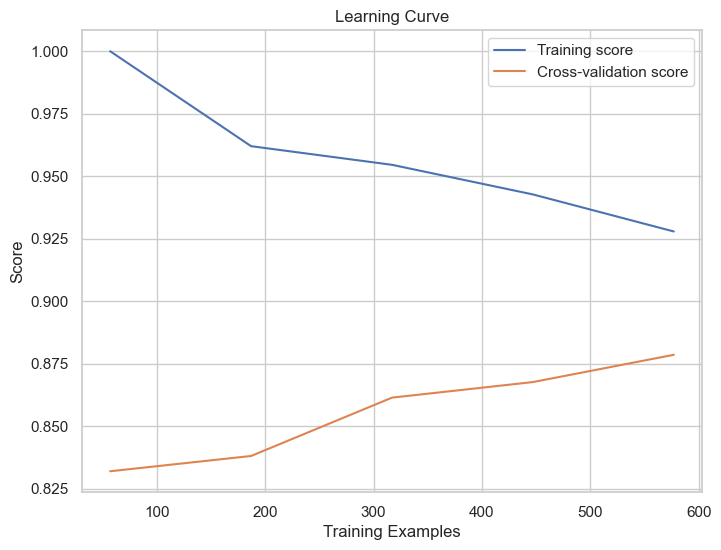

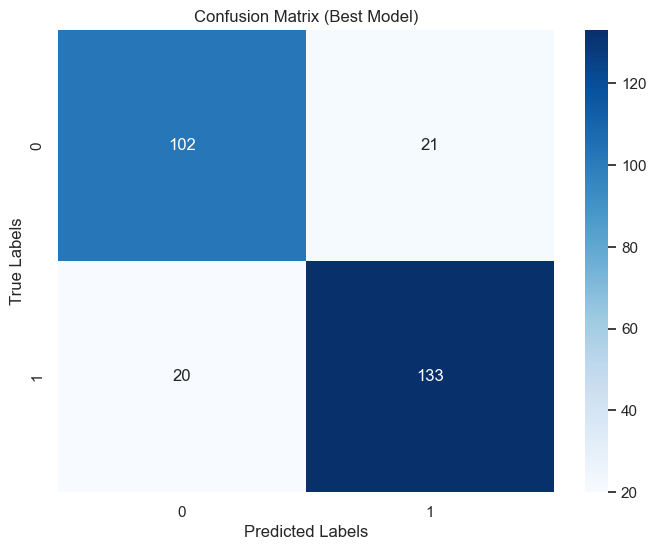

In [30]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForest Classifier
RF = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(RF, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize RandomForest Classifier with best hyperparameters
best_RF = RandomForestClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_RF.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_RF = best_RF.predict(x_test_new)
y_train_pred_RF = best_RF.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_RF)
print("Test set Accuracy (Best Model): ", test_acc_RF)

# Calculate precision, recall, and F1-score for the best model
precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_RF)
print("Recall Score (Best Model): ", recall_score_RF)
print("F1-Score (Best Model): ", f1_score_RF)

# Compute ROC curve and ROC area for the best model
y_score_RF = best_RF.predict_proba(x_test_new)[:, 1]
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_score_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_RF)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_RF))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_RF, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_RF = confusion_matrix(y_test, y_test_pred_RF)
sns.heatmap(conf_RF, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### MLP Classifier

The MLP Classifier (Multi-Layer Perceptron Classifier) is a type of artificial neural network used for classification tasks. It consists of multiple layers of interconnected nodes, including input, hidden, and output layers. Through a process of forward and backward propagation, it learns to classify data by adjusting the weights between nodes. MLP Classifier is known for its capability to capture complex relationships in data, making it suitable for various applications, but it requires careful tuning of hyperparameters and sufficient training data.

Best Hyperparameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Train set Accuracy (Best Model):  0.8940809968847352
Test set Accuracy (Best Model):  0.8586956521739131
Precision Score (Best Model):  0.8701298701298701
Recall Score (Best Model):  0.8758169934640523
F1-Score (Best Model):  0.8729641693811074
ROC AUC (Best Model):  0.9055210159944737

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       123
           1       0.87      0.88      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276




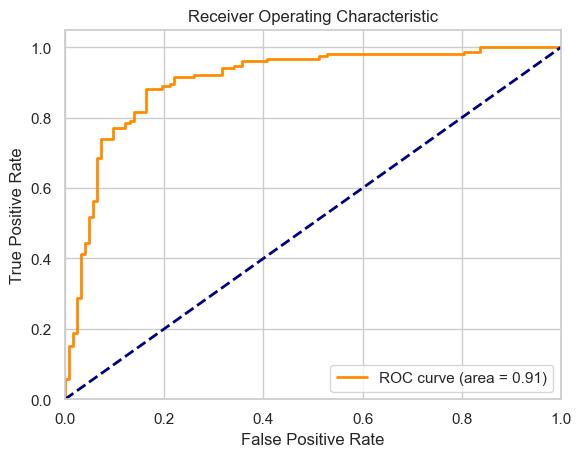

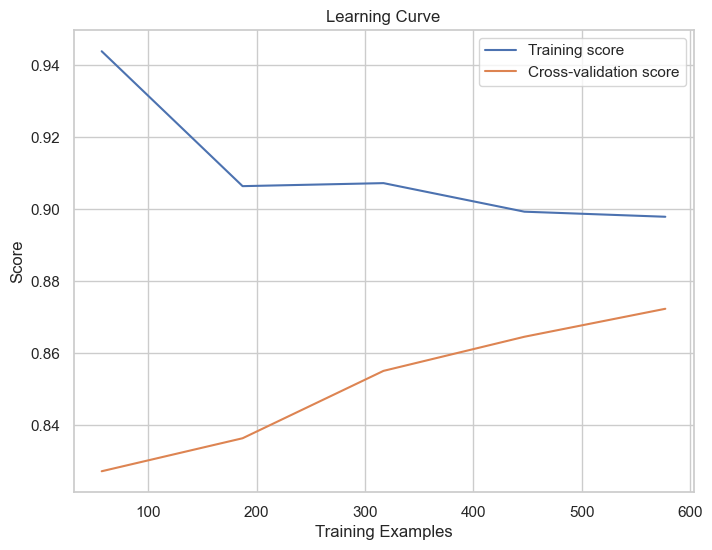

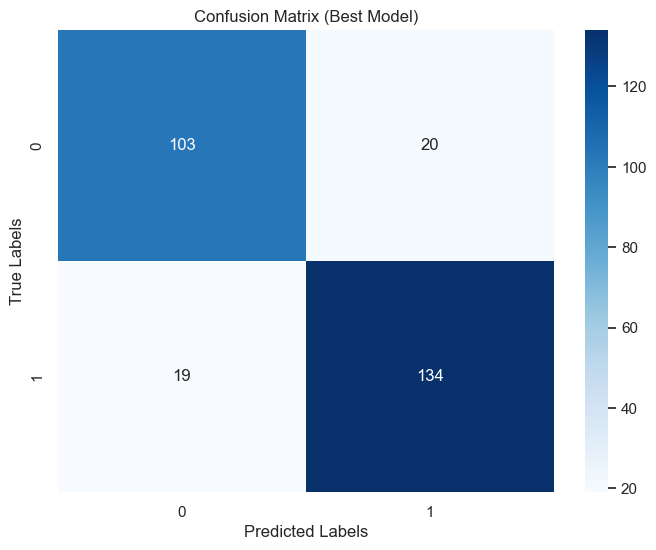

In [31]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP Classifier
MLP = MLPClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(MLP, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize MLP Classifier with best hyperparameters
best_MLP = MLPClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_MLP.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_MLP = best_MLP.predict(x_test_new)
y_train_pred_MLP = best_MLP.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)
train_acc_MLP = accuracy_score(y_train, y_train_pred_MLP)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_MLP)
print("Test set Accuracy (Best Model): ", test_acc_MLP)

# Calculate precision, recall, and F1-score for the best model
precision_score_MLP = precision_score(y_test, y_test_pred_MLP)
recall_score_MLP = recall_score(y_test, y_test_pred_MLP)
f1_score_MLP = f1_score(y_test, y_test_pred_MLP)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_MLP)
print("Recall Score (Best Model): ", recall_score_MLP)
print("F1-Score (Best Model): ", f1_score_MLP)

# Compute ROC curve and ROC area for the best model
y_score_MLP = best_MLP.predict_proba(x_test_new)[:, 1]
fpr_MLP, tpr_MLP, _ = roc_curve(y_test, y_score_MLP)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_MLP)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_MLP))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_MLP, tpr_MLP, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_MLP)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_MLP, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_MLP = confusion_matrix(y_test, y_test_pred_MLP)
sns.heatmap(conf_MLP, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Support Vector Classifier

A Support Vector Classifier (SVC) is a machine learning algorithm used for binary classification tasks. It works by finding a hyperplane that best separates two classes while maximizing the margin between them. It aims to classify new data points based on their position relative to this hyperplane. SVC is effective in handling both linearly separable and non-linearly separable data by using kernel functions that transform the data into higher-dimensional spaces. It is known for its ability to handle complex decision boundaries and robust performance in high-dimensional spaces.

Best Hyperparameters:  {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Train set Accuracy (Best Model):  0.8987538940809969
Test set Accuracy (Best Model):  0.855072463768116
Precision Score (Best Model):  0.864516129032258
Recall Score (Best Model):  0.8758169934640523
F1-Score (Best Model):  0.8701298701298701
ROC AUC (Best Model):  0.879217811785961

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       123
           1       0.86      0.88      0.87       153

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276




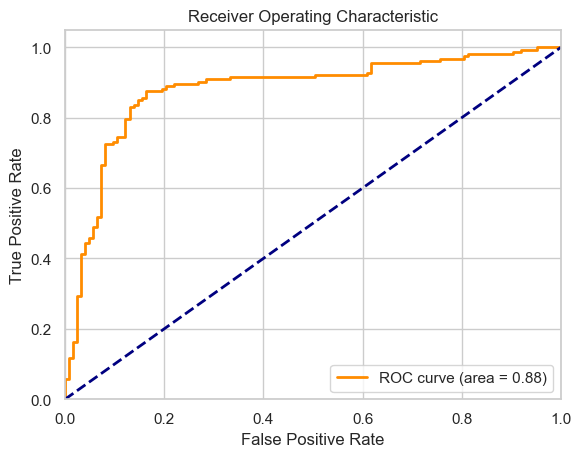

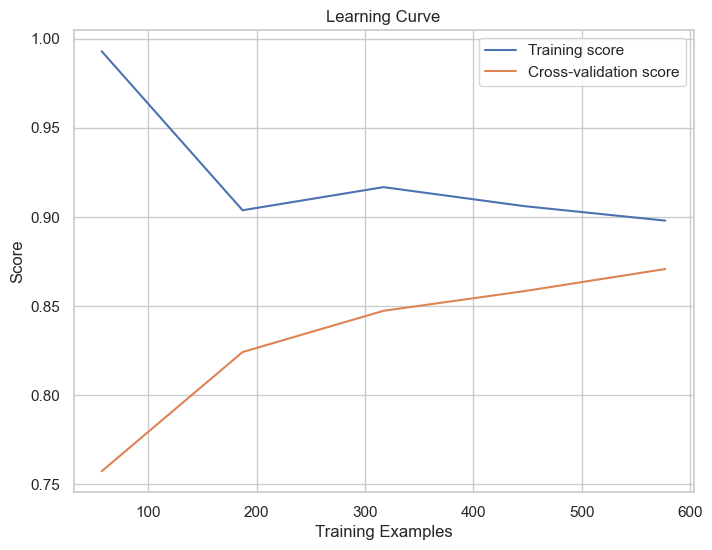

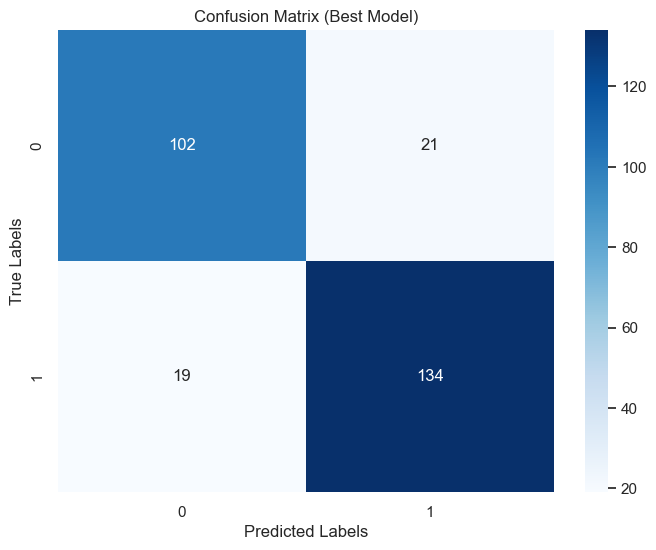

In [32]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM Classifier
SVM = SVC(random_state=0, probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(SVM, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize SVM Classifier with best hyperparameters
best_SVM = SVC(**best_params, random_state=0, probability=True)

# Fit the model with best hyperparameters on the training data
best_SVM.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_SVM = best_SVM.predict(x_test_new)
y_train_pred_SVM = best_SVM.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_SVM = accuracy_score(y_test, y_test_pred_SVM)
train_acc_SVM = accuracy_score(y_train, y_train_pred_SVM)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_SVM)
print("Test set Accuracy (Best Model): ", test_acc_SVM)

# Calculate precision, recall, and F1-score for the best model
precision_score_SVM = precision_score(y_test, y_test_pred_SVM)
recall_score_SVM = recall_score(y_test, y_test_pred_SVM)
f1_score_SVM = f1_score(y_test, y_test_pred_SVM)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_SVM)
print("Recall Score (Best Model): ", recall_score_SVM)
print("F1-Score (Best Model): ", f1_score_SVM)

# Compute ROC curve and ROC area for the best model
y_score_SVM = best_SVM.predict_proba(x_test_new)[:, 1]
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, y_score_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_SVM)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_SVM))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_SVM)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_SVM, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_SVM = confusion_matrix(y_test, y_test_pred_SVM)
sns.heatmap(conf_SVM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Extra Tree Classifier

The Extra Trees (ET) Classifier is an ensemble machine learning algorithm that belongs to the Random Forest family. It constructs multiple decision trees by randomly selecting features and split points, creating a diverse set of trees. During prediction, each tree votes for the class, and the class with the most votes becomes the final prediction. ET Classifier is known for its high speed and robustness against overfitting, making it suitable for various classification tasks.

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Train set Accuracy (Best Model):  0.9003115264797508
Test set Accuracy (Best Model):  0.8478260869565217
Precision Score (Best Model):  0.8580645161290322
Recall Score (Best Model):  0.869281045751634
F1-Score (Best Model):  0.8636363636363638
ROC AUC (Best Model):  0.8996227217174132

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       123
           1       0.86      0.87      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276




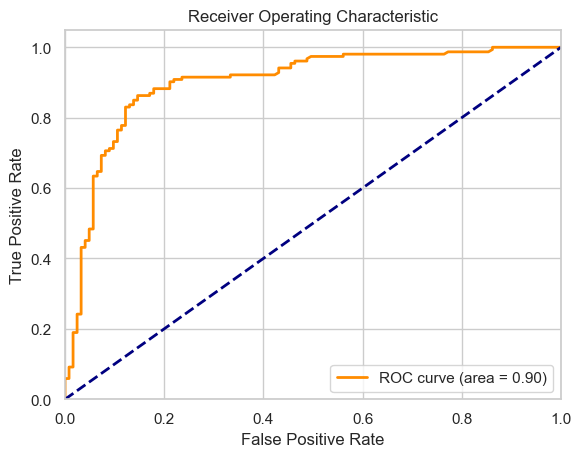

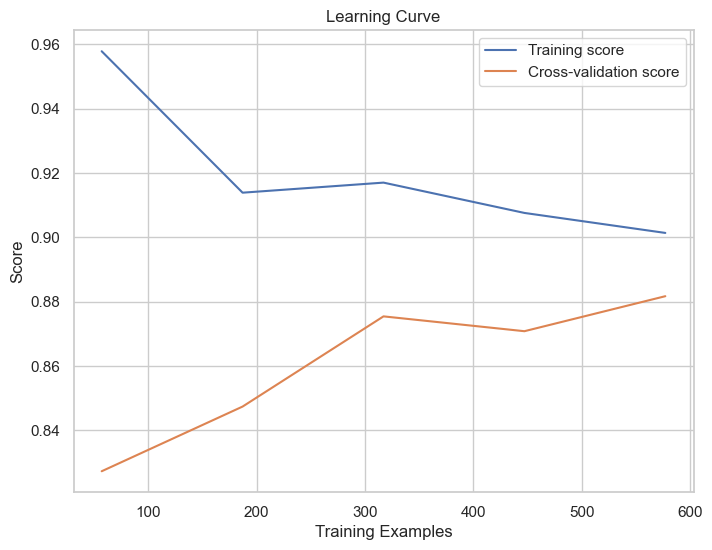

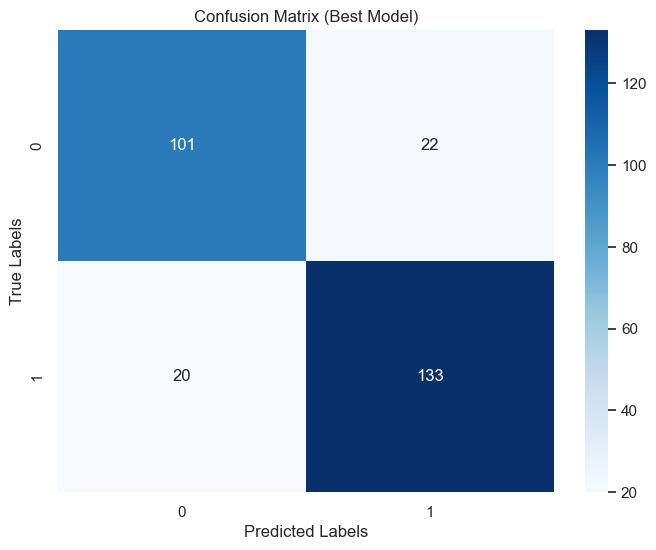

In [33]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Extra Trees Classifier
ET = ExtraTreesClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(ET, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Extra Trees Classifier with best hyperparameters
best_ET = ExtraTreesClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_ET.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_ET = best_ET.predict(x_test_new)
y_train_pred_ET = best_ET.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_ET = accuracy_score(y_test, y_test_pred_ET)
train_acc_ET = accuracy_score(y_train, y_train_pred_ET)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_ET)
print("Test set Accuracy (Best Model): ", test_acc_ET)

# Calculate precision, recall, and F1-score for the best model
precision_score_ET = precision_score(y_test, y_test_pred_ET)
recall_score_ET = recall_score(y_test, y_test_pred_ET)
f1_score_ET = f1_score(y_test, y_test_pred_ET)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_ET)
print("Recall Score (Best Model): ", recall_score_ET)
print("F1-Score (Best Model): ", f1_score_ET)

# Compute ROC curve and ROC area for the best model
y_score_ET = best_ET.predict_proba(x_test_new)[:, 1]
fpr_ET, tpr_ET, _ = roc_curve(y_test, y_score_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_ET)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_ET))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ET)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_ET, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_ET = confusion_matrix(y_test, y_test_pred_ET)
sns.heatmap(conf_ET, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Gradient Boosting Classifier

Gradient Boosting Classifier is a machine learning algorithm that builds an ensemble of decision trees sequentially. It focuses on correcting the errors of previous trees, leading to improved predictive performance. It combines weak learners into a strong learner by assigning more weight to misclassified instances. Through iterations, it creates a powerful model while addressing issues like overfitting, making it popular for various classification tasks.

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Train set Accuracy (Best Model):  0.9143302180685359
Test set Accuracy (Best Model):  0.8514492753623188
Precision Score (Best Model):  0.8733333333333333
Recall Score (Best Model):  0.8562091503267973
F1-Score (Best Model):  0.8646864686468646
ROC AUC (Best Model):  0.9139699240129655

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276




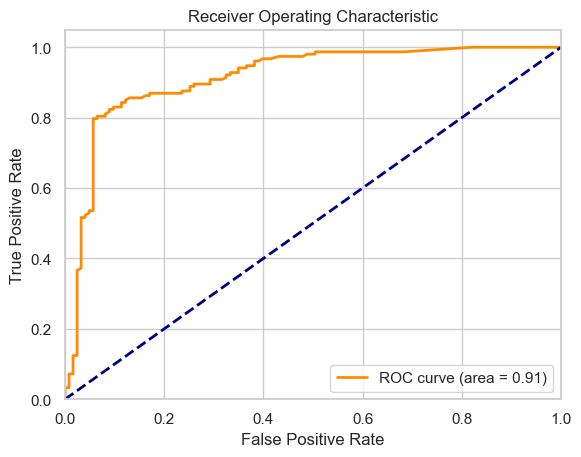

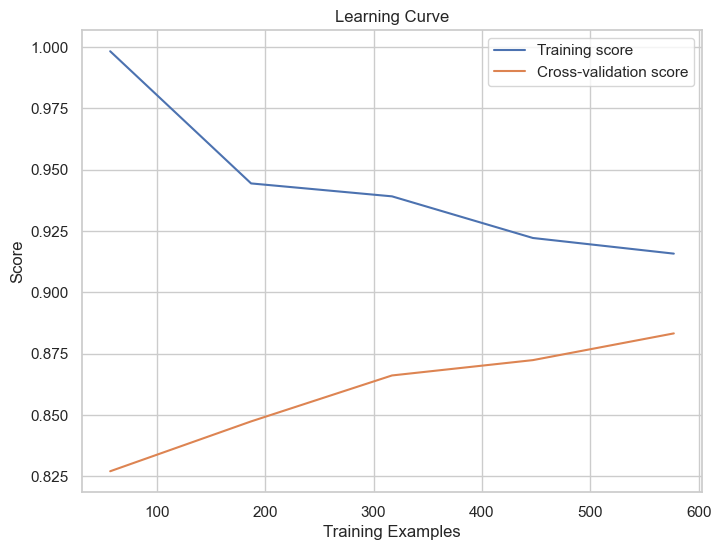

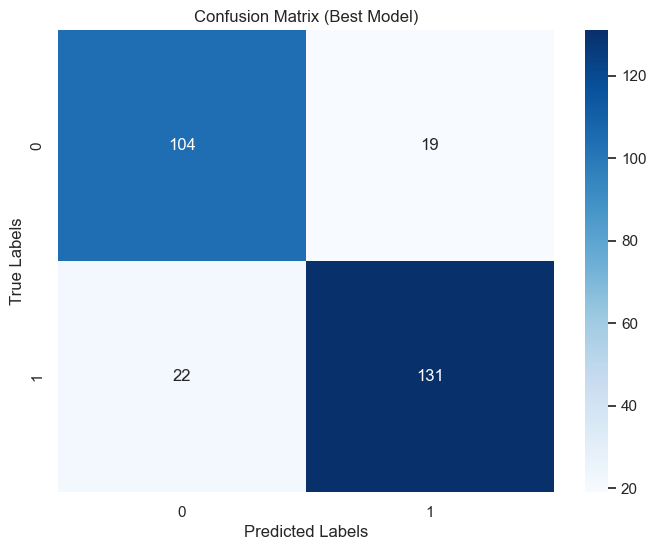

In [34]:
#Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}

# Initialize the Gradient Boosting Classifier
GB = GradientBoostingClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(GB, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Gradient Boosting Classifier with best hyperparameters
best_GB = GradientBoostingClassifier(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_GB.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_GB = best_GB.predict(x_test_new)
y_train_pred_GB = best_GB.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_GB = accuracy_score(y_test, y_test_pred_GB)
train_acc_GB = accuracy_score(y_train, y_train_pred_GB)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_GB)
print("Test set Accuracy (Best Model): ", test_acc_GB)

# Calculate precision, recall, and F1-score for the best model
precision_score_GB = precision_score(y_test, y_test_pred_GB)
recall_score_GB = recall_score(y_test, y_test_pred_GB)
f1_score_GB = f1_score(y_test, y_test_pred_GB)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_GB)
print("Recall Score (Best Model): ", recall_score_GB)
print("F1-Score (Best Model): ", f1_score_GB)

# Compute ROC curve and ROC area for the best model
y_score_GB = best_GB.decision_function(x_test_new)
fpr_GB, tpr_GB, _ = roc_curve(y_test, y_score_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_GB)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_GB))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_GB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_GB, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_GB = confusion_matrix(y_test, y_test_pred_GB)
sns.heatmap(conf_GB, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Logistic Regression

Logistic Regression is a popular binary classification algorithm in machine learning. It models the relationship between input features and a binary target variable using the logistic function, producing probabilities that an instance belongs to a particular class. By applying a threshold, these probabilities can be used for classification. It's interpretable, efficient, and commonly used for tasks like spam detection, medical diagnosis, and sentiment analysis. Regularization techniques like L1 and L2 can be applied to prevent overfitting.

Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Train set Accuracy (Best Model):  0.8535825545171339
Test set Accuracy (Best Model):  0.8152173913043478
Precision Score (Best Model):  0.8445945945945946
Recall Score (Best Model):  0.8169934640522876
F1-Score (Best Model):  0.8305647840531561
ROC AUC (Best Model):  0.8875604442318934

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       123
           1       0.84      0.82      0.83       153

    accuracy                           0.82       276
   macro avg       0.81      0.82      0.81       276
weighted avg       0.82      0.82      0.82       276




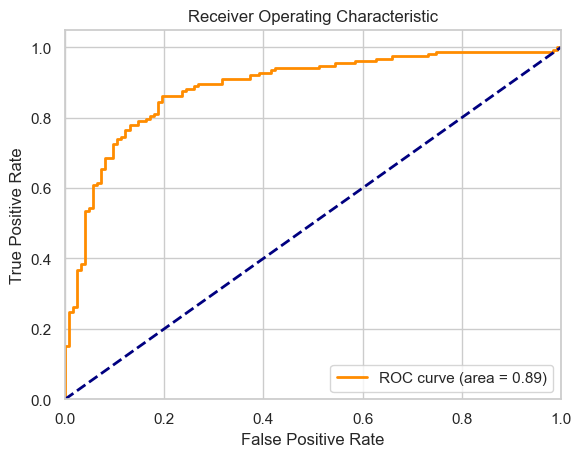

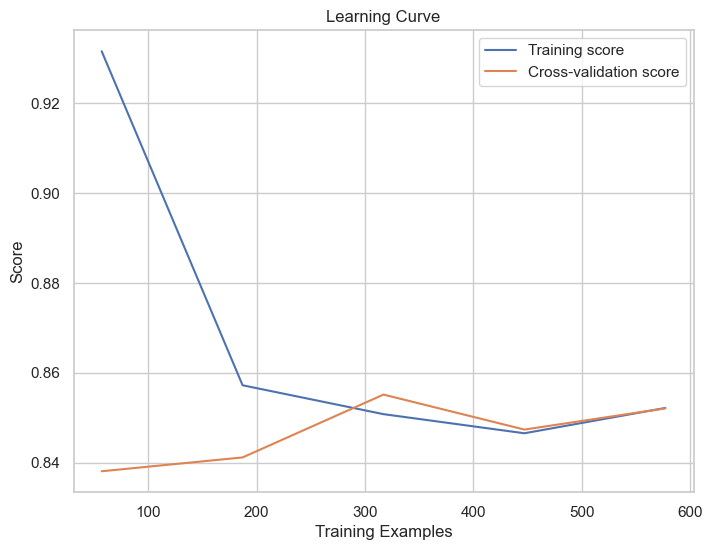

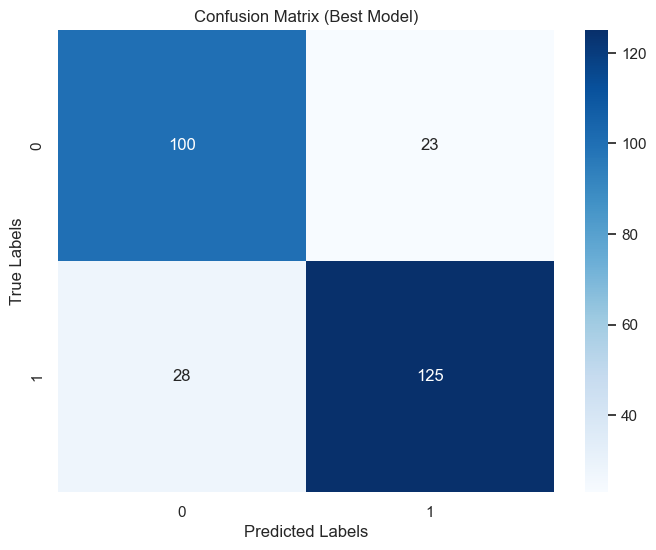

In [35]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression Classifier
LR = LogisticRegression(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(LR, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize Logistic Regression Classifier with best hyperparameters
best_LR = LogisticRegression(**best_params, random_state=0)

# Fit the model with best hyperparameters on the training data
best_LR.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_LR = best_LR.predict(x_test_new)
y_train_pred_LR = best_LR.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_LR)
print("Test set Accuracy (Best Model): ", test_acc_LR)

# Calculate precision, recall, and F1-score for the best model
precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_LR)
print("Recall Score (Best Model): ", recall_score_LR)
print("F1-Score (Best Model): ", f1_score_LR)

# Compute ROC curve and ROC area for the best model
y_score_LR = best_LR.predict_proba(x_test_new)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_score_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_LR)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_LR))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_LR, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_LR = confusion_matrix(y_test, y_test_pred_LR)
sns.heatmap(conf_LR, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### KNeighbors Classifier

The KNeighbors Classifier is a supervised machine learning algorithm used for classification tasks. It works by finding the k nearest data points in the training set to a given input, based on a distance metric. The majority class among these neighbors determines the predicted class of the input. KNeighbors Classifier is intuitive, doesn't require explicit training, and can handle complex decision boundaries, but its effectiveness depends on the choice of 'k' and the nature of the data.

Best Hyperparameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Train set Accuracy (Best Model):  0.8785046728971962
Test set Accuracy (Best Model):  0.8297101449275363
Precision Score (Best Model):  0.8486842105263158
Recall Score (Best Model):  0.8431372549019608
F1-Score (Best Model):  0.8459016393442623
ROC AUC (Best Model):  0.8938572719060524

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       123
           1       0.85      0.84      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276




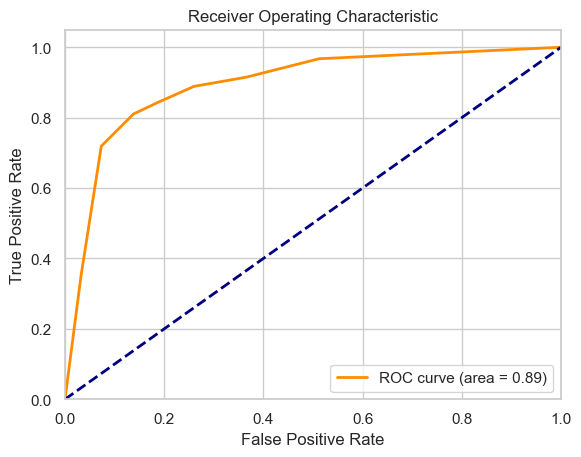

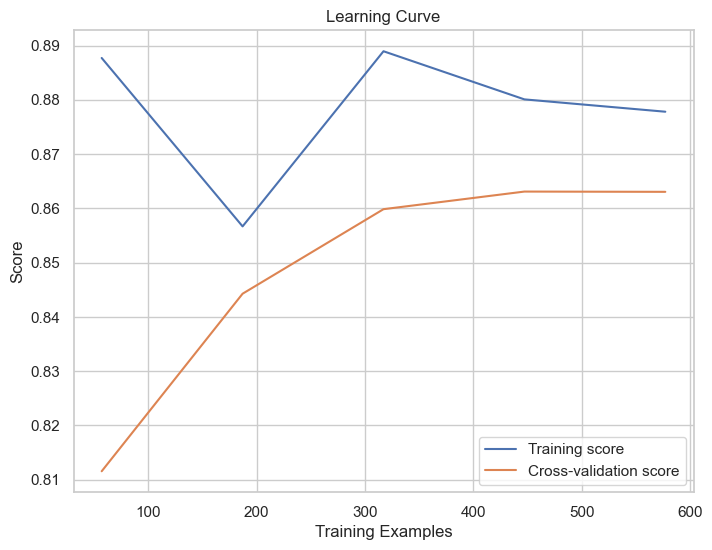

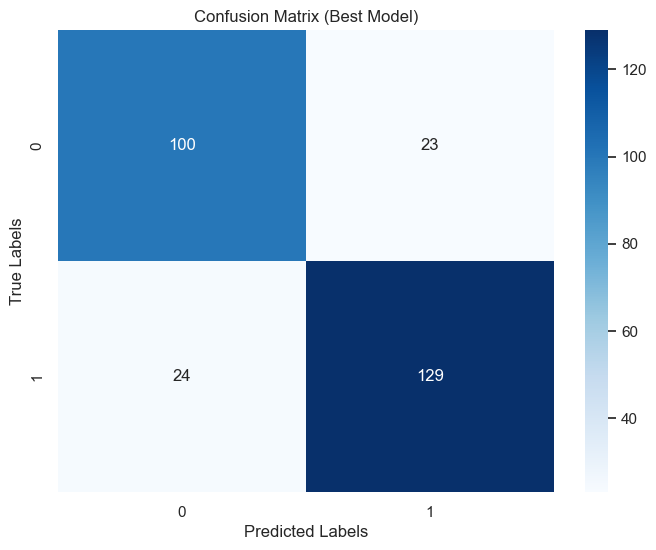

In [36]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the K-Nearest Neighbors Classifier
KNN = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train_new, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize K-Nearest Neighbors Classifier with best hyperparameters
best_KNN = KNeighborsClassifier(**best_params)

# Fit the model with best hyperparameters on the training data
best_KNN.fit(x_train_new, y_train)

# Predictions using the best model
y_test_pred_KNN = best_KNN.predict(x_test_new)
y_train_pred_KNN = best_KNN.predict(x_train_new)

# Calculate accuracy scores using the best model
test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)

# Print the evaluation metrics for the best model
print("Best Hyperparameters: ", best_params)
print("Train set Accuracy (Best Model): ", train_acc_KNN)
print("Test set Accuracy (Best Model): ", test_acc_KNN)

# Calculate precision, recall, and F1-score for the best model
precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)

# Print precision, recall, and F1-score
print("Precision Score (Best Model): ", precision_score_KNN)
print("Recall Score (Best Model): ", recall_score_KNN)
print("F1-Score (Best Model): ", f1_score_KNN)

# Compute ROC curve and ROC area for the best model
y_score_KNN = best_KNN.predict_proba(x_test_new)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_score_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

# Print ROC AUC for the best model
print("ROC AUC (Best Model): ", roc_auc_KNN)

# Print the classification report for the best model
print("\nClassification Report (Best Model):\n%s\n" % classification_report(y_test, y_test_pred_KNN))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(best_KNN, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the best model
plt.figure(figsize=(8, 6))
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)
sns.heatmap(conf_KNN, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Stacking Classifier

A Stacking Classifier is an ensemble machine learning technique that combines the predictions of multiple base classifiers to create a more robust and accurate final prediction. It involves training a meta-model that takes the outputs of the base classifiers as input features. The base classifiers make individual predictions, and the meta-model learns to combine their predictions effectively. Stacking helps leverage the strengths of different algorithms, potentially improving overall performance and handling complex relationships within the data.

Train set Accuracy (Stacking Classifier):  0.9392523364485982
Test set Accuracy (Stacking Classifier):  0.8442028985507246
Precision Score (Stacking Classifier):  0.8716216216216216
Recall Score (Stacking Classifier):  0.8431372549019608
F1-Score (Stacking Classifier):  0.8571428571428572
ROC AUC (Stacking Classifier):  0.9038737446197992

Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       123
           1       0.87      0.84      0.86       153

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276




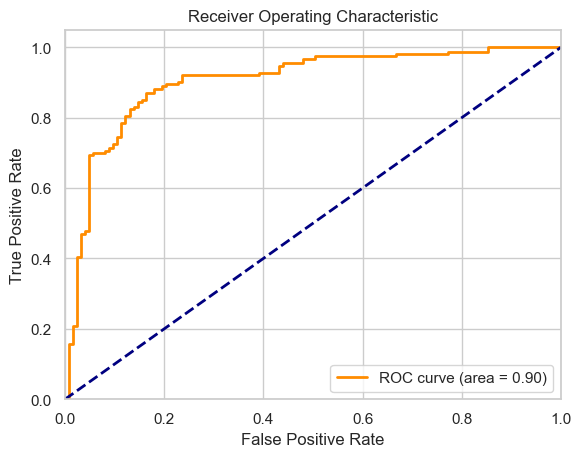

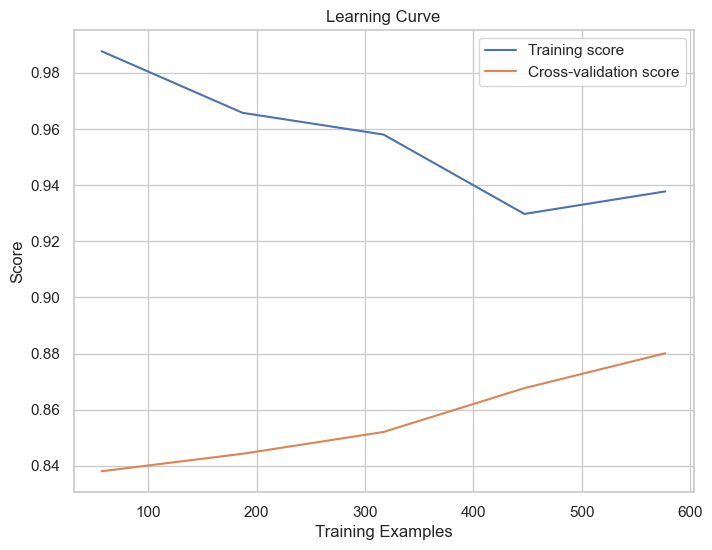

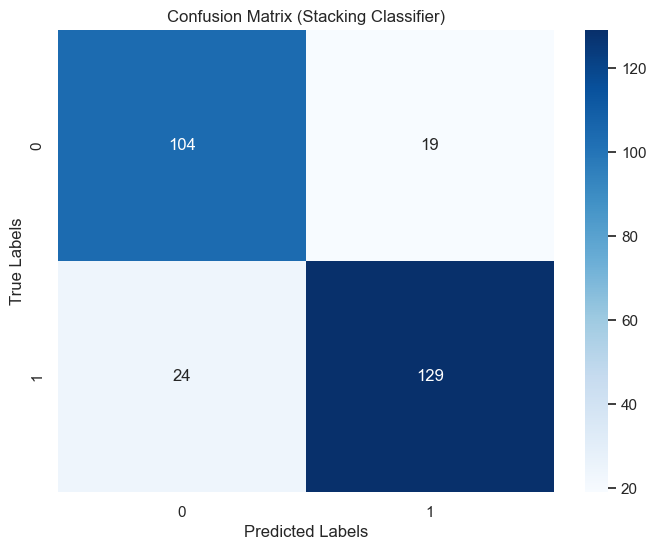

In [37]:
# Initialize individual classifiers
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(random_state=0)
SVM = SVC(probability=True, random_state=0)
MLP = MLPClassifier(random_state=0)
ET = ExtraTreesClassifier(random_state=0)
LR = LogisticRegression(random_state=0)
KNN = KNeighborsClassifier()
GB = GradientBoostingClassifier(random_state=0)

# Define base classifiers
estimators = [('DT', DT),
              ('RF', RF),
              ('SVM', SVM),
              ('MLP', MLP),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('GB', GB),
             ]

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the Stacking Classifier on the training data
stacking_clf.fit(x_train_new, y_train)

# Predictions using the Stacking Classifier
y_test_pred_SC = stacking_clf.predict(x_test_new)
y_train_pred_SC = stacking_clf.predict(x_train_new)

# Calculate accuracy scores using the Stacking Classifier
test_acc_SC = accuracy_score(y_test, y_test_pred_SC)
train_acc_SC = accuracy_score(y_train, y_train_pred_SC)

# Print the evaluation metrics for the Stacking Classifier
print("Train set Accuracy (Stacking Classifier): ", train_acc_SC)
print("Test set Accuracy (Stacking Classifier): ", test_acc_SC)

# Calculate precision, recall, and F1-score for the Stacking Classifier
precision_SC = precision_score(y_test, y_test_pred_SC)
recall_SC = recall_score(y_test, y_test_pred_SC)
f1_SC = f1_score(y_test, y_test_pred_SC)

# Print precision, recall, and F1-score
print("Precision Score (Stacking Classifier): ", precision_SC)
print("Recall Score (Stacking Classifier): ", recall_SC)
print("F1-Score (Stacking Classifier): ", f1_SC)

# Compute ROC curve and ROC area for the Stacking Classifier
y_score_SC = stacking_clf.predict_proba(x_test_new)[:, 1]
fpr_SC, tpr_SC, _ = roc_curve(y_test, y_score_SC)
roc_auc_SC = auc(fpr_SC, tpr_SC)

# Print ROC AUC for the Stacking Classifier
print("ROC AUC (Stacking Classifier): ", roc_auc_SC)

# Print the classification report for the Stacking Classifier
print("\nClassification Report (Stacking Classifier):\n%s\n" % classification_report(y_test, y_test_pred_SC))

# Plot ROC curve for the Stacking Classifier
plt.figure()
plt.plot(fpr_SC, tpr_SC, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_SC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve for the Stacking Classifier
plt.figure(figsize=(8, 6))
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, x_train_new, y_train, cv=10, scoring='accuracy')
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Plot the confusion matrix for the Stacking Classifier
plt.figure(figsize=(8, 6))
conf_SC = confusion_matrix(y_test, y_test_pred_SC)
sns.heatmap(conf_SC, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Stacking Classifier)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Model Comparision

In [38]:
##  Saving the values of all the model to a list of tuples containing the names and model name

models = []
models.append(('DT', DT))
models.append(('RF', RF))
models.append(('MLP', MLP))
models.append(('SVM', SVM))
models.append(('ET', ET))
models.append(('LR', LR))
models.append(('KNN', KNN))
models.append(('GB', GB))
models.append(('SC', stacking_clf))

# Initialize lists to store results and names
results = []
names = []
# Loop through each model
for name, model in models:
# Set up cross-validation with 10 folds
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    # Perform cross-validation and store results
    cv_results = cross_val_score(model, x_train_new, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # Print mean and standard deviation of cross-validation results
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)

DT: 0.827067 (0.043446)
RF: 0.867572 (0.040957)
MLP: 0.847284 (0.042011)
SVM: 0.862837 (0.047990)
ET: 0.853534 (0.040899)
LR: 0.839543 (0.049430)
KNN: 0.844207 (0.047442)
GB: 0.876875 (0.048183)
SC: 0.878462 (0.053082)


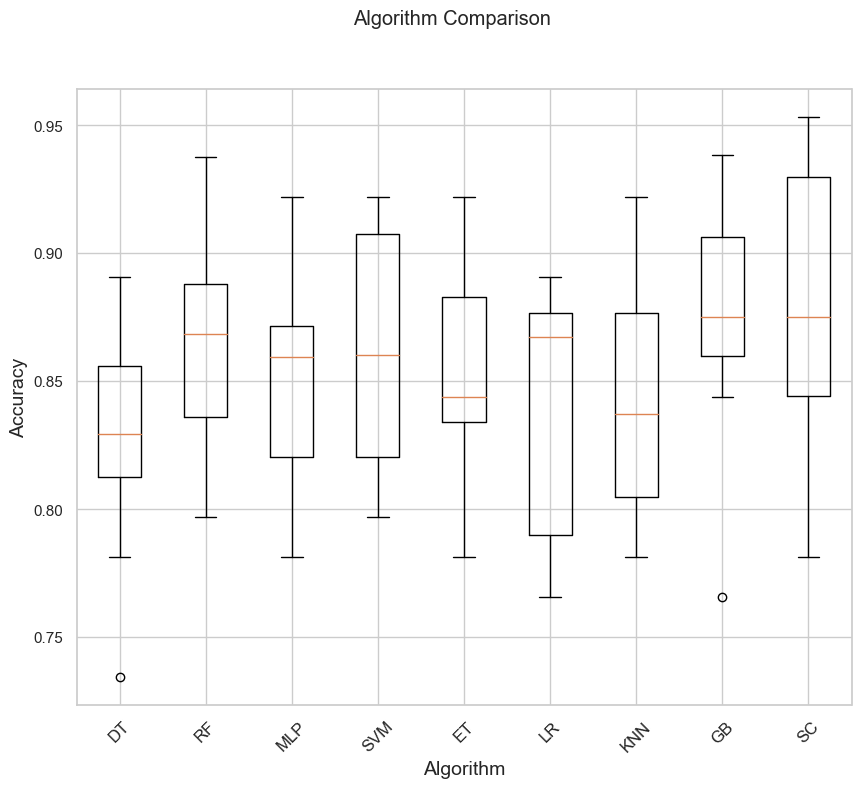

In [39]:
# Create a box plot of algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names, rotation=45, fontsize=12)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [40]:
# Create a list of tuples to store comparison metrics for different models
compare_models = [
    # (Model Name, Train Accuracy, Test Accuracy, 
    # Precision Score, Recall Score, F1 Score, Notes/Remarks)
    ('Decision Tree', train_acc_DT, test_acc_DT, precision_score_DT, recall_score_DT, f1_score_DT, ''),
    ('Random Forest', train_acc_RF, test_acc_RF, precision_score_RF, recall_score_RF, f1_score_RF, 'The first best'),
    ('MLP', train_acc_MLP, test_acc_MLP, precision_score_MLP, recall_score_MLP, f1_score_MLP, ''),
    ('SVC', train_acc_SVM, test_acc_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM, ''),
    ('Extra Tree', train_acc_ET, test_acc_ET, precision_score_ET, recall_score_ET, f1_score_ET, ''),
    ('GradientBoosting', train_acc_GB, test_acc_GB, precision_score_GB, recall_score_GB, f1_score_GB, ''),
    ('Logistic Regression', train_acc_LR, test_acc_LR, precision_score_LR, recall_score_LR, f1_score_LR, ''),
    ('KNN', train_acc_KNN, test_acc_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN, ''),
    ('Stacking', train_acc_SC, test_acc_SC, precision_SC, recall_SC, f1_SC, 'The second best'),
]

In [41]:
# Create a DataFrame from the compare_models list
predict = pd.DataFrame(data=compare_models, columns=['Model', 'Train_accuracy', 'Test_accuracy', 'precision_score', 'recall_score', 'f1_score', 'Description'])
predict.style.background_gradient(cmap='RdPu')

#### The criterion for selecting the final model: Checking the difference between train and test accuracy (Checking the model in terms of overfitting) and then Checking the variance

### The first best -- RF

In [42]:
# Storing the prediction correlation
conf_matrix_RF = confusion_matrix(y_test, y_test_pred_RF)

<AxesSubplot:>

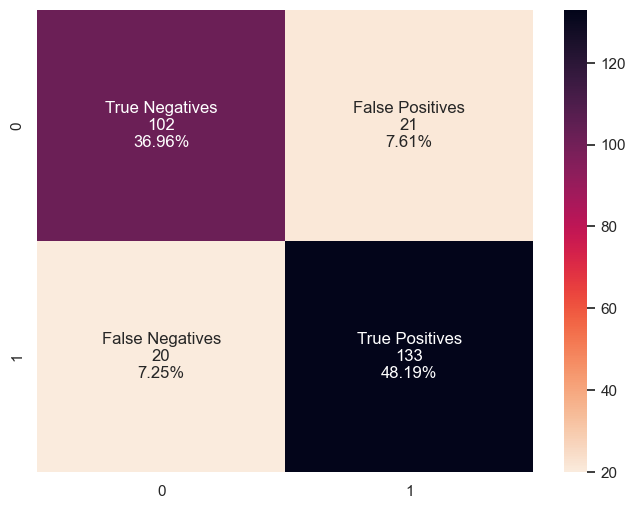

In [43]:
# Plotting heatmap of the correlation
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_RF.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_RF.flatten()/np.sum(conf_matrix_RF)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_RF, annot=labels, fmt= '', cmap="rocket_r")

### The second best -- Stacking

In [44]:
# Storing the prediction correlation
conf_matrix_SC = confusion_matrix(y_test, y_test_pred_SC)

<AxesSubplot:>

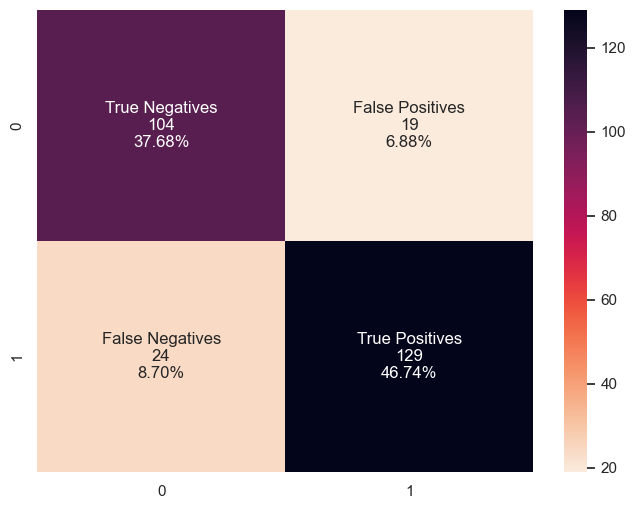

In [45]:
# Plotting heatmap of the correlation
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_SC.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_SC.flatten()/np.sum(conf_matrix_SC)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_SC, annot=labels, fmt= '', cmap="rocket_r")

### Confusion_matrix for cross_val_predict

#### Random Forest

In [46]:
# Storing the prediction correlation
y_pred_cross_val_RF = cross_val_predict(RF, x_test_new, y_test, cv=10)
conf_matrix_cross_val_RF = confusion_matrix(y_test, y_pred_cross_val_RF)

<AxesSubplot:>

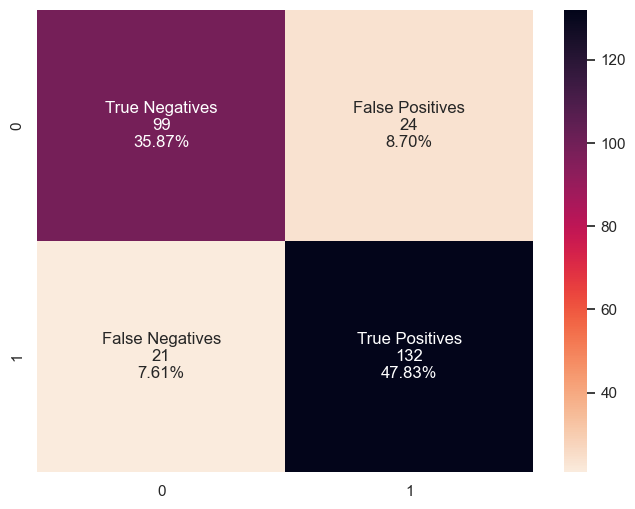

In [47]:
# Plotting heatmap of the correlation
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_cross_val_RF.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_cross_val_RF.flatten()/np.sum(conf_matrix_cross_val_RF)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_cross_val_RF, annot=labels, fmt= '', cmap="rocket_r")

#### Stacking

In [48]:
# Storing the prediction correlation
y_pred_cross_val_SC = cross_val_predict(stacking_clf, x_test_new, y_test, cv=10)
conf_matrix_cross_val_SC = confusion_matrix(y_test, y_pred_cross_val_SC)

<AxesSubplot:>

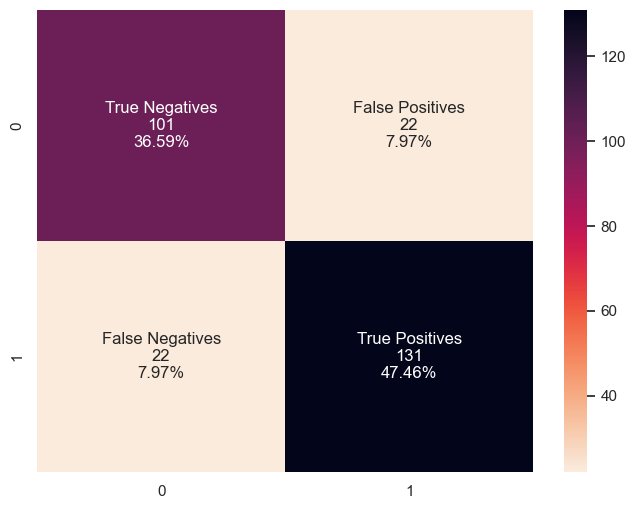

In [49]:
# Plotting heatmap of the correlation
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_cross_val_SC.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_cross_val_SC.flatten()/np.sum(conf_matrix_cross_val_SC)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_cross_val_SC, annot=labels, fmt= '', cmap="rocket_r")

## Conclusion

#### Our best model is - Random Forest

From the employed list of algorithms, Random Forest and additionally Stacking Classifier showed the top performance with the following performance metrics,
Random Forest – Train Accuracy:  92.52% | Test Accuracy: 85.814% | f1 Score: 86.64%
Stacking Classifier – Train Accuracy:  93.45% | Test Accuracy: 84.42% | f1 Score:  85.71%